In [371]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#import clean data and define datatypes
nps_df = pd.read_csv("Clean Data\MonthlyVisits_2000-2022.csv")
nps_df['Date'] = pd.to_datetime(nps_df['Date'])

covid_df = pd.read_csv("Clean Data\Weekly_United_States_COVID-19_Cases_and_Deaths_by_State_-_ARCHIVED.csv")
covid_df['date_updated'] = pd.to_datetime(covid_df['date_updated'])
covid_df['start_date'] = pd.to_datetime(covid_df['start_date'])
covid_df['end_date'] = pd.to_datetime(covid_df['end_date'])

In [373]:
#find what states are in each region
state_region = nps_df[['State', 'Region']]
state_region = state_region.drop_duplicates()

#create a region column in the COVID dataframe by mergering on state
merged_df = covid_df.merge(state_region, left_on='state', right_on = 'State')
merged_df.tail()


,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths,State,Region
10375,2023-04-13,WY,2023-04-06,2023-04-12,186284,158,2023,3,0,0,WY,Intermountain
10376,2023-04-20,WY,2023-04-13,2023-04-19,186399,115,2027,4,0,0,WY,Intermountain
10377,2023-04-27,WY,2023-04-20,2023-04-26,186539,140,2030,3,0,0,WY,Intermountain
10378,2023-05-04,WY,2023-04-27,2023-05-03,186668,129,2031,1,0,0,WY,Intermountain
10379,2023-05-11,WY,2023-05-04,2023-05-10,187034,366,2031,0,0,0,WY,Intermountain


In [374]:
#summarize visitors per region for each month
nps_df_filter = nps_df.query('Year > 2019')
regional_visits = pd.pivot_table(nps_df_filter, values=['RecreationVisits'], columns=['Year'], 
                                 index=['Region'], aggfunc = np.sum)
#normalize table
norm_reg_visits=(regional_visits-regional_visits.mean())/regional_visits.std()

#sumamrize covid cases per region for each week (or month?)
merged_df_filter = merged_df.query('end_date < 2023')
regional_cases = pd.pivot_table(merged_df_filter, values=['new_cases'], 
                                columns=merged_df.end_date.dt.year, index=['Region'], 
                                aggfunc = np.sum)
#normalize table
norm_reg_cases=(regional_cases-regional_cases.mean())/regional_cases.std()

#merge pivot tables together based on region
merged_regional = norm_reg_visits.merge(norm_reg_cases, left_on='Region', right_on = 'Region')
merged_regional

RecreationVisits                     new_cases            \
Year                          2020      2021      2022      2020      2021   
Region                                                                       
Alaska                   -1.719983 -1.783896 -1.816944 -1.503342 -1.524749   
Intermountain             0.443710  0.574316  0.235159  0.268620  0.154680   
Midwest                  -0.703982 -0.778854 -0.872364  1.176796  0.789313   
National Capital         -0.262843  0.017903  0.403915 -1.143399 -1.095719   
Northeast                 0.217436  0.128175  0.319027  0.109091  0.512979   
Pacific West              0.711857  0.631889  0.621745  0.117627 -0.084431   
Southeast                 1.313806  1.210467  1.109462  0.974607  1.247927   

                             
Year                   2022  
Region                       
Alaska            -1.594644  
Intermountain      0.028386  
Midwest            0.550836  
National Capital  -1.122421  
Northeast          0.417975  
Pacific West       0.513968  
Southeast          1.205899

The Pivot table above looks nice but becuase of its structure I couldn't make a visualization of. In the next cell I create a separate pivot table for recreation visits and new cases for each year (total of 6 tables). From there, I merged the visits and cases by year (now 3 tables), and concatenated them together (1 table)!

In [375]:
#create summary table for number of visitors in each region each year
nps_2019 = nps_df.query('Year == 2019')
reg_visits_2019 = pd.pivot_table(nps_2019, values=['RecreationVisits'], index=['Region'], aggfunc = np.sum)

nps_2020 = nps_df.query('Year == 2020')
reg_visits_2020 = pd.pivot_table(nps_2020, values=['RecreationVisits'], index=['Region', 'Year'], aggfunc = np.sum)

nps_2021 = nps_df.query('Year == 2021')
reg_visits_2021 = pd.pivot_table(nps_2021, values=['RecreationVisits'], index=['Region', 'Year'], aggfunc = np.sum)

nps_2022 = nps_df.query('Year == 2022')
reg_visits_2022 = pd.pivot_table(nps_2022, values=['RecreationVisits'], index=['Region', 'Year'], aggfunc = np.sum)

#create a summary table for new cases in each region in each year
covid_2020 = merged_df.query('end_date.dt.year == 2020')
reg_cases_2020 = pd.pivot_table(covid_2020, values=['new_cases'], index=['Region', covid_2020.end_date.dt.year], aggfunc = np.sum)

covid_2021 = merged_df.query('end_date.dt.year == 2021')
reg_cases_2021 = pd.pivot_table(covid_2021, values=['new_cases'], index=['Region', covid_2021.end_date.dt.year], aggfunc = np.sum)

covid_2022 = merged_df.query('end_date.dt.year == 2022')
reg_cases_2022 = pd.pivot_table(covid_2022, values=['new_cases'], index=['Region', covid_2022.end_date.dt.year], aggfunc = np.sum)

#merge based on region and year
viscase2020 = reg_visits_2020.merge(reg_cases_2020, left_on=['Region', 'Year'], right_on = ['Region','end_date'])
viscase2020['year'] = 2020

viscase2021 = reg_visits_2021.merge(reg_cases_2021, left_on=['Region', 'Year'], right_on = ['Region','end_date'])
viscase2021['year'] = 2021

viscase2022 = reg_visits_2022.merge(reg_cases_2022, left_on=['Region', 'Year'], right_on = ['Region','end_date'])
viscase2022['year'] = 2022

#added new case data for 2019 (pre-pandemic)
viscase2019 = reg_visits_2019
viscase2019['new_cases'] = 0
viscase2019['year'] = 2019

#concatenated tables together
visits_and_cases = pd.concat([viscase2019, viscase2020, viscase2021, viscase2022])
visits_and_cases = visits_and_cases.reset_index()
visits_and_cases.head(14)

,Region,RecreationVisits,new_cases,year
0,Alaska,3218301,0,2019
1,Intermountain,56032229,0,2019
2,Midwest,21683100,0,2019
3,National Capital,54748049,0,2019
4,Northeast,59905811,0,2019
5,Pacific West,63322600,0,2019
6,Southeast,68606529,0,2019
7,Alaska,406688,45802,2020
8,Intermountain,42498027,3419042,2020
9,Midwest,20171434,5147916,2020


Text(0, 0.5, 'New Cases')

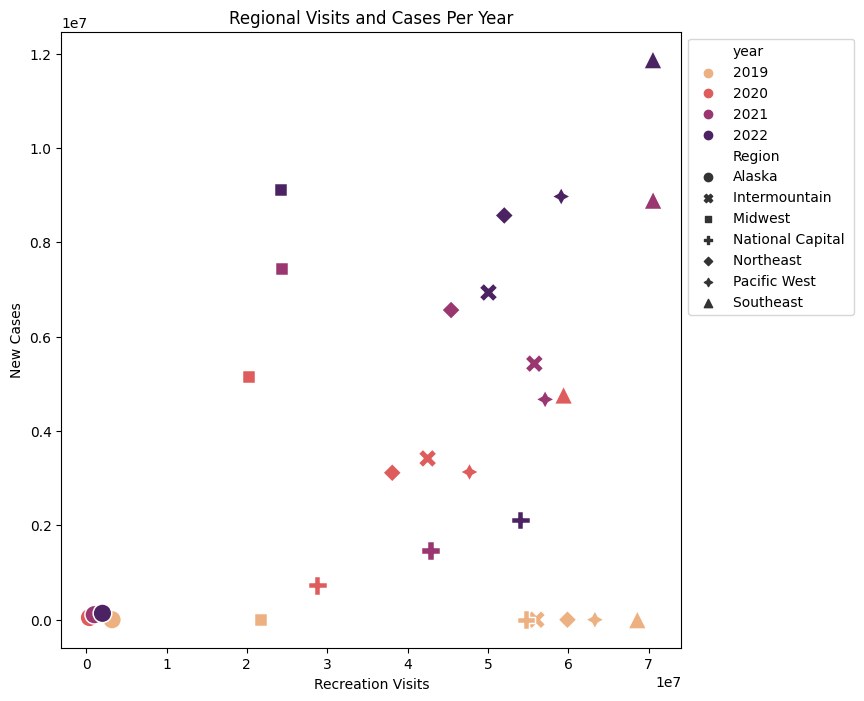

In [376]:
#create a scatter plot of Visits versus cases marking the year and region
df = visits_and_cases

sns.scatterplot(data=df, x='RecreationVisits', y='new_cases', s=180,
                hue = 'year', style = 'Region', palette="flare")
plt.legend(bbox_to_anchor =(1,1))

plt.title("Regional Visits and Cases Per Year")
plt.xlabel("Recreation Visits")
plt.ylabel("New Cases")